In [22]:
import pandas as pd
import numpy as np
import matplotlib,plotly as plt
from warnings import filterwarnings
filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import statsmodels.api as sm

### MULTIPLE LINEAR REGRESSION ###

In [24]:
# enter the csv file into the model 
df=pd.read_csv(r"C:\Users\vijay\Downloads\machine learning\healthcare_insurance_to_preprocessed.csv")
df


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [26]:
# seperating numerical columns and the categorical columns and make a encoding of categorical variable
df.dtypes

age         float64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [28]:
df_numeric=df.select_dtypes(include='number')
df_numeric                           

,age,bmi,children,charges
0,19.0,NaN,0,16884.92400
1,18.0,33.770,1,1725.55230
2,28.0,33.000,3,4449.46200
3,33.0,22.705,0,21984.47061
4,32.0,28.880,0,3866.85520
...,...,...,...,...
1333,50.0,30.970,3,10600.54830
1334,18.0,31.920,0,2205.98080
1335,18.0,36.850,0,1629.83350
1336,21.0,25.800,0,2007.94500


In [30]:
df_categorical=df.select_dtypes(exclude='number')
df_categorical 

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [32]:
# finding the shape of the numerical data frame

df_numeric.shape



(1338, 4)

In [34]:
!pip install sidetable

In [35]:
# the side table method is used for simplifies the process 
# gettting a counts and the percentages of particular categories and their cumlative percentages 


import sidetable as stb

df.stb.freq(['sex'])

,sex,count,percent,cumulative_count,cumulative_percent
0,male,676,50.523169,676,50.523169
1,female,662,49.476831,1338,100.000000


In [36]:
# this one is giving the missing values sums and not null counts percentage of missing values coparing  with total values 

df.stb.missing()

,missing,total,percent
bmi,9,1338,0.672646
age,8,1338,0.597907
sex,0,1338,0.000000
children,0,1338,0.000000
smoker,0,1338,0.000000
region,0,1338,0.000000
charges,0,1338,0.000000


In [37]:
df_numeric1 = df_numeric.dropna(axis = 0 , how = 'any')
df_numeric1.isnull().sum()

age         0
bmi         0
children    0
charges     0
dtype: int64

In [38]:
df_numeric1.shape

(1321, 4)

In [39]:
df_numeric1.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [46]:
x=df_numeric1[['age', 'bmi', 'children']]
y=df_numeric1[['charges']]

In [48]:
print(x)
print()
print(y)

       age     bmi  children
1     18.0  33.770         1
2     28.0  33.000         3
3     33.0  22.705         0
4     32.0  28.880         0
5     31.0  25.740         0
...    ...     ...       ...
1333  50.0  30.970         3
1334  18.0  31.920         0
1335  18.0  36.850         0
1336  21.0  25.800         0
1337  61.0  29.070         0

[1321 rows x 3 columns]

          charges
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
5      3756.62160
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1321 rows x 1 columns]


In [50]:
# spliting the above data into train and test set split in the ratio of 80:20

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [52]:
x_train,x_test,y_train,y_test


(       age     bmi  children
 608   28.0  26.980         2
 748   47.0  36.000         1
 1279  25.0  26.790         2
 1032  30.0  27.930         0
 1028  54.0  31.600         0
 ...    ...     ...       ...
 726   41.0  28.405         1
 922   38.0  31.000         1
 1113  28.0  26.315         3
 245   54.0  30.020         0
 1078  28.0  31.680         0
 
 [1056 rows x 3 columns],
        age     bmi  children
 298   31.0  34.390         3
 199   64.0  39.330         0
 866   18.0  37.290         0
 1103  58.0  36.080         0
 195   19.0  30.590         0
 ...    ...     ...       ...
 947   37.0  34.200         1
 1061  57.0  27.940         1
 1299  19.0  25.745         1
 365   49.0  30.780         1
 944   62.0  39.930         0
 
 [265 rows x 3 columns],
           charges
 608    4435.09420
 748    8556.90700
 1279   4189.11310
 1032   4137.52270
 1028   9850.43200
 ...           ...
 726    6664.68595
 922    5488.26200
 1113   5312.16985
 245   24476.47851
 1078  34672.147

In [54]:
# importing the logistic regression model 
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [56]:
# predicting the y values based on the x_test values
# there the y values are predicted based on the x_test values 
# and comparing the y_test value and the y_pred values and the accuuracy of the our Ml model algoritham
# after the model is trained we can predict the y value sbased on the x_train model too..

y_pred=model.predict(x_test)


In [58]:
print(y_pred)
print(y_test)

[[13746.56643224]
 [21357.13942194]
 [10116.38855666]
 [18889.79597463]
 [ 8097.89805691]
 [14473.60666815]
 [10781.65104984]
 [ 6730.03861187]
 [ 6080.73948328]
 [ 8856.51593056]
 [17844.65530079]
 [15984.32376829]
 [13071.25812756]
 [19536.72446322]
 [16750.62023763]
 [ 9076.02352405]
 [14252.04139565]
 [10559.41419158]
 [19037.37344887]
 [10390.84228472]
 [15417.79681506]
 [17955.77287387]
 [11512.53312317]
 [16133.11364609]
 [ 8220.48360807]
 [13748.36868446]
 [11319.38374011]
 [10656.34919142]
 [14572.53393445]
 [12921.53787014]
 [11106.06716318]
 [ 9929.98904462]
 [17554.03352427]
 [10043.58045568]
 [17980.60914393]
 [11138.65252064]
 [14885.13640245]
 [ 7717.43002761]
 [ 8192.48387761]
 [ 5586.19510434]
 [ 9565.36314527]
 [16695.03351147]
 [ 8672.19213421]
 [21563.72587659]
 [21964.99661218]
 [15386.65166085]
 [15951.44519861]
 [ 5573.46569185]
 [17077.87218078]
 [10722.31443883]
 [15437.70350296]
 [ 9958.64403628]
 [ 9046.08398216]
 [10148.57750391]
 [14636.38396866]
 [20845.14

In [60]:
# lets we get the ols method based summary
 # building a model on the train dataset with an intercept
 # fit() is used to fit the OLS model

SLR_model=sm.OLS(y_train,x_train).fit()


In [62]:
print(SLR_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.593
Model:                            OLS   Adj. R-squared (uncentered):              0.591
Method:                 Least Squares   F-statistic:                              510.5
Date:                Thu, 04 Jul 2024   Prob (F-statistic):                   9.66e-205
Time:                        15:35:59   Log-Likelihood:                         -11370.
No. Observations:                1056   AIC:                                  2.275e+04
Df Residuals:                    1053   BIC:                                  2.276e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [64]:
 # building a model on the train dataset with an intercept
 # fit() is used to fit the OLS mode
SLR_model = sm.OLS(y_test, x_test).fit()



In [66]:
print(SLR_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.607
Model:                            OLS   Adj. R-squared (uncentered):              0.602
Method:                 Least Squares   F-statistic:                              134.7
Date:                Thu, 04 Jul 2024   Prob (F-statistic):                    8.54e-53
Time:                        15:36:01   Log-Likelihood:                         -2842.0
No. Observations:                 265   AIC:                                      5690.
Df Residuals:                     262   BIC:                                      5701.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [69]:
# the multiple linear regression model predict the charges based on the independent vaariables we given 

model.predict([[35,38,1]])
                

array([[14795.80608241]])

In [71]:
model.predict([[35,58,3]])

array([[22586.10085977]])

### logistic regression ###

In [74]:
df_numeric1



,age,bmi,children,charges
1,18.0,33.770,1,1725.55230
2,28.0,33.000,3,4449.46200
3,33.0,22.705,0,21984.47061
4,32.0,28.880,0,3866.85520
5,31.0,25.740,0,3756.62160
...,...,...,...,...
1333,50.0,30.970,3,10600.54830
1334,18.0,31.920,0,2205.98080
1335,18.0,36.850,0,1629.83350
1336,21.0,25.800,0,2007.94500


In [76]:
# create a new column for the charges category

def charges_category(charges):
    if charges < 20000:
        return 'high'
    else:
        return 'low'

df_numeric1['charges_category'] = df_numeric1['charges'].apply(charges_category)


In [78]:
df_numeric1

,age,bmi,children,charges,charges_category
1,18.0,33.770,1,1725.55230,high
2,28.0,33.000,3,4449.46200,high
3,33.0,22.705,0,21984.47061,low
4,32.0,28.880,0,3866.85520,high
5,31.0,25.740,0,3756.62160,high
...,...,...,...,...,...
1333,50.0,30.970,3,10600.54830,high
1334,18.0,31.920,0,2205.98080,high
1335,18.0,36.850,0,1629.83350,high
1336,21.0,25.800,0,2007.94500,high


In [80]:
from sklearn.preprocessing import OrdinalEncoder

# Instance:

ordinal = OrdinalEncoder()

df_numeric1['charges_category'] = ordinal.fit_transform(df_numeric1[['charges_category']])

df_numeric1.head()

,age,bmi,children,charges,charges_category
1,18.0,33.770,1,1725.55230,0.0
2,28.0,33.000,3,4449.46200,0.0
3,33.0,22.705,0,21984.47061,1.0
4,32.0,28.880,0,3866.85520,0.0
5,31.0,25.740,0,3756.62160,0.0


In [82]:
df_numeric.drop(['charges'],axis=1)


,age,bmi,children
0,19.0,NaN,0
1,18.0,33.770,1
2,28.0,33.000,3
3,33.0,22.705,0
4,32.0,28.880,0
...,...,...,...
1333,50.0,30.970,3
1334,18.0,31.920,0
1335,18.0,36.850,0
1336,21.0,25.800,0


In [84]:
x1=df_numeric1[['age', 'bmi', 'children']]
y1=df_numeric1['charges_category']

In [86]:
# spliting the above data into train and test set split in the ratio of 80:20

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=1)

In [88]:
x1_train,x1_test,y1_train, y1_test

(       age     bmi  children
 608   28.0  26.980         2
 748   47.0  36.000         1
 1279  25.0  26.790         2
 1032  30.0  27.930         0
 1028  54.0  31.600         0
 ...    ...     ...       ...
 726   41.0  28.405         1
 922   38.0  31.000         1
 1113  28.0  26.315         3
 245   54.0  30.020         0
 1078  28.0  31.680         0
 
 [1056 rows x 3 columns],
        age     bmi  children
 298   31.0  34.390         3
 199   64.0  39.330         0
 866   18.0  37.290         0
 1103  58.0  36.080         0
 195   19.0  30.590         0
 ...    ...     ...       ...
 947   37.0  34.200         1
 1061  57.0  27.940         1
 1299  19.0  25.745         1
 365   49.0  30.780         1
 944   62.0  39.930         0
 
 [265 rows x 3 columns],
 608     0.0
 748     0.0
 1279    0.0
 1032    0.0
 1028    0.0
        ... 
 726     0.0
 922     0.0
 1113    0.0
 245     1.0
 1078    1.0
 Name: charges_category, Length: 1056, dtype: float64,
 298     1.0
 199     0.0
 

In [90]:
model=LogisticRegression()
model.fit(x1_train, y1_train)


LogisticRegression()

In [92]:
y1_pred=model.predict(x1_test)

In [94]:
print(y1_pred)
print(y1_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
298     1.0
199     0.0
866     0.0
1103    0.0
195     0.0
       ... 
947     1.0
1061    0.0
1299    0.0
365     0.0
944     0.0
Name: charges_category, Length: 265, dtype: float64


In [96]:
#classification_report LIBRARY
from sklearn.metrics import classification_report

#classification_report
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       213
         1.0       0.00      0.00      0.00        52

    accuracy                           0.80       265
   macro avg       0.40      0.50      0.45       265
weighted avg       0.65      0.80      0.72       265



In [98]:
from sklearn import metrics 

conf_mat=metrics.confusion_matrix(y1_test, y1_pred)
print('Confusion Matrix : ', conf_mat)
print()

Accuracy_score=metrics.accuracy_score(y1_test, y1_pred) 
print('Accuracy Score : ', Accuracy_score) 
print()

print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')

Confusion Matrix :  [[213   0]
 [ 52   0]]

Accuracy Score :  0.8037735849056604

Accuracy in Percentage :  80 %


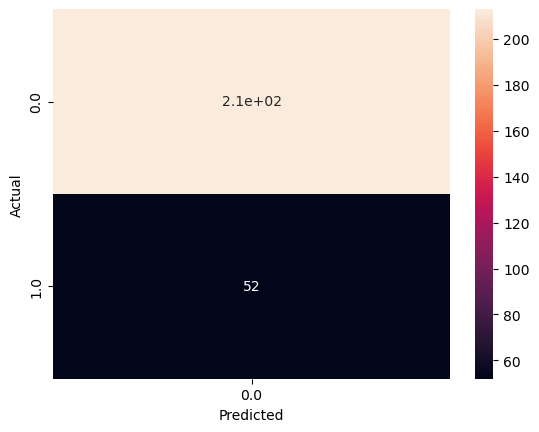

In [100]:
from sklearn .metrics import confusion_matrix

conf_mat=pd.crosstab(y1_test, y1_pred, rownames=['Actual'],colnames=['Predicted'])  
sns.heatmap(conf_mat, annot=True)
plt.show()


In [102]:
conf_mat

Predicted,0.0
Actual,
0.0,213
1.0,52


In [104]:
print('score: ', model.score(x1,y1)*100, '%')

score:  79.71233913701741 %


In [106]:
model.predict([[35,58,3]])

array([0.])

In [108]:
model.predict([[55,58,1]])

array([1.])

 ### conclusion  ###

in the above machine learning models the logistic regression model gives the high accuracy than the multiple linear model type

### DECISION TREE MODEL ###

In [113]:
# enter the csv file into the model 
df3=pd.read_csv(r"C:\Users\vijay\Downloads\machine learning\healthcare_insurance_to_preprocessed.csv")
df3


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [115]:
df_numeric

,age,bmi,children,charges
0,19.0,NaN,0,16884.92400
1,18.0,33.770,1,1725.55230
2,28.0,33.000,3,4449.46200
3,33.0,22.705,0,21984.47061
4,32.0,28.880,0,3866.85520
...,...,...,...,...
1333,50.0,30.970,3,10600.54830
1334,18.0,31.920,0,2205.98080
1335,18.0,36.850,0,1629.83350
1336,21.0,25.800,0,2007.94500


In [117]:
df_numeric3=df_numeric1
df_numeric3

,age,bmi,children,charges,charges_category
1,18.0,33.770,1,1725.55230,0.0
2,28.0,33.000,3,4449.46200,0.0
3,33.0,22.705,0,21984.47061,1.0
4,32.0,28.880,0,3866.85520,0.0
5,31.0,25.740,0,3756.62160,0.0
...,...,...,...,...,...
1333,50.0,30.970,3,10600.54830,0.0
1334,18.0,31.920,0,2205.98080,0.0
1335,18.0,36.850,0,1629.83350,0.0
1336,21.0,25.800,0,2007.94500,0.0


In [119]:
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 

In [121]:
df_numeric3.isnull().sum() 

age                 0
bmi                 0
children            0
charges             0
charges_category    0
dtype: int64

### assigning dependent and independent variables ### 

In [124]:
# the charges_category is classified as high=0 ,low=1

feature_cols=['age','bmi','children']
x3=df_numeric3[feature_cols] 
y3=df_numeric3['charges_category']

In [126]:
print(x,y)

       age     bmi  children
1     18.0  33.770         1
2     28.0  33.000         3
3     33.0  22.705         0
4     32.0  28.880         0
5     31.0  25.740         0
...    ...     ...       ...
1333  50.0  30.970         3
1334  18.0  31.920         0
1335  18.0  36.850         0
1336  21.0  25.800         0
1337  61.0  29.070         0

[1321 rows x 3 columns]           charges
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
5      3756.62160
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1321 rows x 1 columns]


### splitting the dataset into Training and Testing Dataset ###


In [129]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3,y3,    
  test_size=0.2, random_state=5)  
display(x_train3.shape, y_train3.shape, x_test3.shape,   
  y_test3.shape) 

(1056, 3)

(1056,)

(265, 3)

(265,)

In [131]:
#Fitting the Model (Decision Tree Classifier) 

model=DecisionTreeClassifier()
model.fit(x_train3,y_train3)

DecisionTreeClassifier()

In [133]:
# predicting the y values based on the x_test values

y_pred3=model.predict(x_test)

In [135]:
print(y_pred3,y_test3)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0.] 663     0.0
707     0.0
362     0.0
174     0.0
409     0.0
       ... 
927     0.0
652     0.0
1196    1.0
675     0.0
671     0.0
Name: charges_category, Length: 265, dtype: float64


### Evaluation Metrics ### 

In [138]:
conf_mat=metrics.confusion_matrix(y_test3, y_pred3)  
print('Confusion Matrix : ', conf_mat) 


Confusion Matrix :  [[160  50]
 [ 45  10]]


In [140]:
Accuracy_score=metrics.accuracy_score(y_test3, y_pred3) 
print('Accuracy Score : ', Accuracy_score) 
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')

Accuracy Score :  0.6415094339622641
Accuracy in Percentage :  64 %


<Axes: >

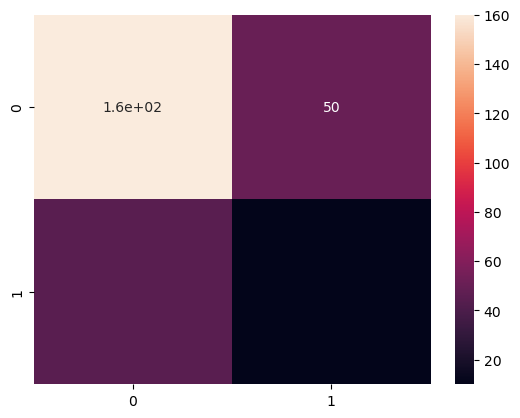

In [142]:
conf_mat_dec_tree=pd.crosstab(y_test3, y_pred3, rownames=['Actual'], 
colnames=['Predicted']) 
sns.heatmap(conf_mat, annot=True)

In [144]:
conf_mat_dec_tree

Predicted,0.0,1.0
Actual,,
0.0,160,50
1.0,45,10


In [146]:
print('\n',classification_report(y_pred3,y_test3)) 


               precision    recall  f1-score   support

         0.0       0.76      0.78      0.77       205
         1.0       0.18      0.17      0.17        60

    accuracy                           0.64       265
   macro avg       0.47      0.47      0.47       265
weighted avg       0.63      0.64      0.64       265



### LINEAR REGRESSION ###

In [149]:
df_numeric4=df_numeric1
df_numeric4

,age,bmi,children,charges,charges_category
1,18.0,33.770,1,1725.55230,0.0
2,28.0,33.000,3,4449.46200,0.0
3,33.0,22.705,0,21984.47061,1.0
4,32.0,28.880,0,3866.85520,0.0
5,31.0,25.740,0,3756.62160,0.0
...,...,...,...,...,...
1333,50.0,30.970,3,10600.54830,0.0
1334,18.0,31.920,0,2205.98080,0.0
1335,18.0,36.850,0,1629.83350,0.0
1336,21.0,25.800,0,2007.94500,0.0


In [151]:
# find the shape of the data frame
df_numeric4.shape

(1321, 5)

In [153]:
# scaling the dataframe for our linear regression model and fit in the model

from sklearn.preprocessing import StandardScaler

standard_scaling = StandardScaler()

Scaled_data = standard_scaling.fit_transform(df_numeric4)
Scaled_df = pd.DataFrame(Scaled_data , columns = df_numeric4.columns)

Scaled_df

,age,bmi,children,charges,charges_category
0,-1.513562,0.510491,-0.085263,-0.955657,-0.504491
1,-0.799332,0.384226,1.571092,-0.729518,-0.504491
2,-0.442217,-1.303950,-0.913440,0.726241,1.982197
3,-0.513640,-0.291372,-0.913440,-0.777886,-0.504491
4,-0.585063,-0.806270,-0.913440,-0.787037,-0.504491
...,...,...,...,...,...
1316,0.771974,0.051347,1.571092,-0.218854,-0.504491
1317,-1.513562,0.207128,-0.913440,-0.915772,-0.504491
1318,-1.513562,1.015550,-0.913440,-0.963603,-0.504491
1319,-1.299293,-0.796431,-0.913440,-0.932213,-0.504491


In [155]:
x4= Scaled_df['age'].to_frame()
y4 = Scaled_df['charges'].to_frame()

In [157]:
print(x4,y4)

           age
0    -1.513562
1    -0.799332
2    -0.442217
3    -0.513640
4    -0.585063
...        ...
1316  0.771974
1317 -1.513562
1318 -1.513562
1319 -1.299293
1320  1.557627

[1321 rows x 1 columns]        charges
0    -0.955657
1    -0.729518
2     0.726241
3    -0.777886
4    -0.787037
...        ...
1316 -0.218854
1317 -0.915772
1318 -0.963603
1319 -0.932213
1320  1.320406

[1321 rows x 1 columns]


In [159]:
# splitting the datas into training and testing data
x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y4,test_size=0.2, random_state = 1)

In [161]:
x4_train,x4_test,y4_train, y4_test

(           age
 597  -0.799332
 737   0.557705
 1262 -1.013601
 1015 -0.656486
 1011  1.057666
 ...        ...
 715   0.129167
 905  -0.085102
 1096 -0.799332
 235   1.057666
 1061 -0.799332
 
 [1056 rows x 1 columns],
            age
 288  -0.585063
 190   1.771895
 854  -1.513562
 1086  1.343358
 186  -1.442139
 ...        ...
 930  -0.156525
 1044  1.271935
 1282 -1.442139
 355   0.700551
 927   1.629049
 
 [265 rows x 1 columns],
        charges
 597  -0.730710
 737  -0.388517
 1262 -0.751132
 1015 -0.755415
 1011 -0.281129
 ...        ...
 715  -0.545609
 905  -0.643276
 1096 -0.657895
 235   0.933127
 1061  1.779573
 
 [1056 rows x 1 columns],
        charges
 288   2.117814
 190   0.138213
 854  -1.004149
 1086 -0.155531
 186  -0.962796
 ...        ...
 930   2.142797
 1044 -0.139680
 1282 -0.873859
 355  -0.287113
 927  -0.021073
 
 [265 rows x 1 columns])

In [163]:
# create an LinearRegression algoritham and fit the train models into it

model=LinearRegression()
model.fit(x4_train, y4_train)


LinearRegression()

In [165]:
# predicting the y values based on the x values
y4_pred=model.predict(x4_test)

In [167]:
print(y4_pred)
print(y4_test)

[[-0.15904455]
 [ 0.51054079]
 [-0.42282059]
 [ 0.388798  ]
 [-0.40253012]
 [ 0.12502196]
 [-0.28078733]
 [-0.28078733]
 [-0.36194919]
 [-0.42282059]
 [ 0.388798  ]
 [ 0.14531243]
 [-0.11846362]
 [ 0.28734568]
 [ 0.20618382]
 [-0.36194919]
 [-0.07788269]
 [-0.26049687]
 [ 0.49025032]
 [-0.19962547]
 [ 0.0438601 ]
 [ 0.26705521]
 [ 0.14531243]
 [ 0.51054079]
 [-0.42282059]
 [ 0.26705521]
 [-0.07788269]
 [-0.42282059]
 [ 0.22647428]
 [ 0.0438601 ]
 [-0.21991594]
 [-0.28078733]
 [ 0.28734568]
 [-0.19962547]
 [ 0.24676475]
 [-0.07788269]
 [ 0.20618382]
 [-0.42282059]
 [-0.34165873]
 [-0.38223966]
 [-0.21991594]
 [-0.01701129]
 [-0.17933501]
 [ 0.46995986]
 [ 0.26705521]
 [ 0.14531243]
 [ 0.14531243]
 [-0.42282059]
 [ 0.18589335]
 [-0.15904455]
 [ 0.0438601 ]
 [-0.32136826]
 [-0.42282059]
 [-0.15904455]
 [ 0.02356964]
 [ 0.49025032]
 [ 0.28734568]
 [ 0.40908847]
 [ 0.34821707]
 [-0.42282059]
 [ 0.08444103]
 [ 0.24676475]
 [-0.26049687]
 [ 0.26705521]
 [ 0.14531243]
 [-0.11846362]
 [ 0.16560

In [169]:
 # building a model on the train dataset with an intercept
 # fit() is used to fit the OLS model
 SLR_model2 = sm.OLS(y4_train, x4_train).fit()

In [171]:
 # print the summary output
print(SLR_model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.080
Model:                            OLS   Adj. R-squared (uncentered):              0.079
Method:                 Least Squares   F-statistic:                              91.52
Date:                Thu, 04 Jul 2024   Prob (F-statistic):                    7.53e-21
Time:                        15:36:50   Log-Likelihood:                         -1461.4
No. Observations:                1056   AIC:                                      2925.
Df Residuals:                    1055   BIC:                                      2930.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [173]:
model.predict([[35]])*100

array([[995.0271358]])

In [322]:
a=pd.DataFrame({'MACHINE LEARNING TYPES':['linear model','multiple linear model','logistic model','decision tree'],
                'percentage of accuracy':[79,60 ,80,64]})
a.sort_values(by='percentage of accuracy')  
a

,MACHINE LEARNING TYPES,percentage of accuracy
0,linear model,79
1,multiple linear model,60
2,logistic model,80
3,decision tree,64


### GRAPHICAL CHART ###

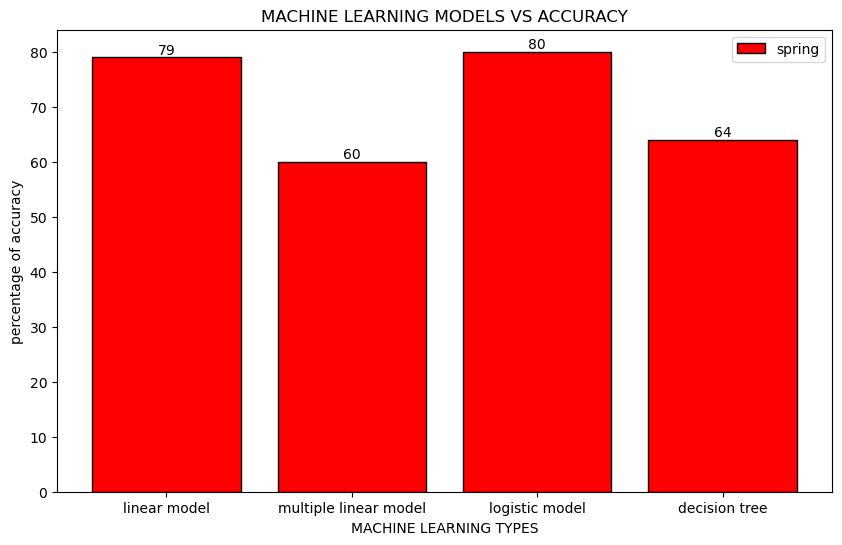

In [325]:
plt.figure(figsize=(10, 6)) 
bars=plt.bar(a['MACHINE LEARNING TYPES'],a['percentage of accuracy'],color='red',edgecolor='black',label='spring')

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')
    
plt.title('MACHINE LEARNING MODELS VS ACCURACY')
plt.xlabel('MACHINE LEARNING TYPES')
plt.ylabel('percentage of accuracy')
plt.legend()
plt.show()


### conclusion ###

 The health care insurance data is done by the above machine learning models and the logistic regression model gives the high accuracy upto 80% to find the health care charges.